In [361]:
import numpy as np
import pandas as pd
from scipy.stats import binom
from scipy.stats import uniform, bernoulli

from scipy.stats import beta
from scipy.stats import betabinom
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np
rng = np.random.default_rng()

plt.rcParams["figure.figsize"] = (5,3)

https://app.diagrams.net/#G1YM2D2ebDdepO6ZMQ2p65xGcgHqq8Ph49

# Bayes for a set of random events

My own way of understanding Bayesian Inference.
Heavily based on:
- My examples are partially taken from: https://www.bayesrulesbook.com/chapter-6.html
- My understanding is coming from: https://xcelab.net/rm/statistical-rethinking/

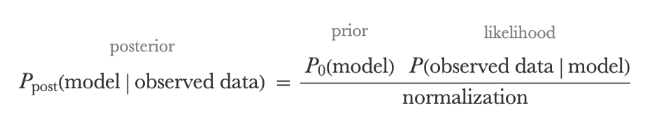

## 1. You have some prior knowledge about the probability of each random event

There is a set of events for which we have some a-priori knowledge of probabilities.

For example, let's take the following situation:

> You're about to get on a plane to Seattle. You want to know if you should bring an umbrella. You call a friendof yours who live there and ask if it's raining. Your friend has a 2/3 chance of telling you the truth and a 1/3 chance of messing with you by lying. He tells you that "Yes" it is raining. What is the probability that it's actually raining in Seattle?

We are interested in the probabilities of 2 events:
- Event "Rain"
- Event "NoRain"

You might not know anything about the probabilities of each of these events, but you might have some a-priori. Either way, you can express your current belief in probabilities of each of those events.

We can visualize our current, our "prior" knowledge with a graph like the following


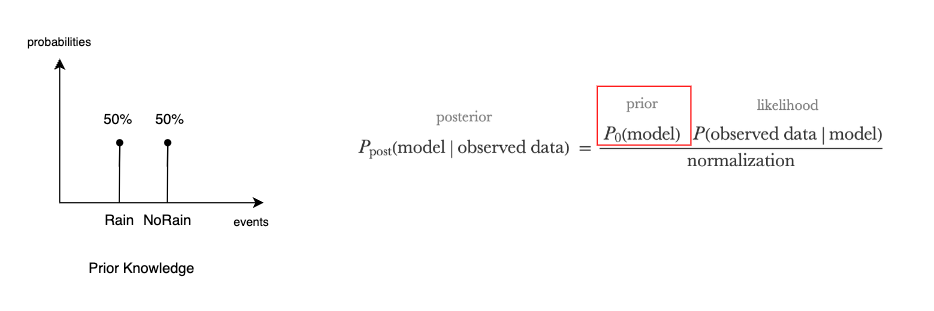

In [362]:
probabilities = pd.DataFrame({
    'events': ['Rain', 'NoRain'],
    'prior_knowledge': [0.5, 0.5],
});

probabilities

,events,prior_knowledge
0,Rain,0.5
1,NoRain,0.5


## 2. You have an additional knowledge: the relationship between another event happening and the probabilities of events Rain and NoRain

Now, there is *another* event happening: you call a friend and he tells you that it is raining. And you know (maybe from past experiences) that this friend is lying 1/3rd of the time.

The event happening: "Calling a 1/3rd lying friend that tells you it is raining"

Note something: this is another event, which happens "on top" of the event raining/not raninig. But there is a relationship between these events that (for some reason) you can exactly express mathematically.

The trick is to apply this relationship, and understand the likelihood of the event "Calling a 1/3rd lying friend that tells you it is raining" in each of the initial events:
- Rain: in this situation there is 2/3 chances of the friend saying that it rains
- NoRain: in this situation there is 1/3 chances of the friend saying that it rains

So we now have a sytem to tell, in each situtation "Rain" and "NoRain" of the initial event, what are the chances of observing this new event of the friend mentioning rain.

- The event "Calling a 1/3rd lying friend that tells you it is raining" is called the *data*
- Your prior expcations in the events "Rain"/"NoRain" is called the *prior*

I like to visualize this on top of the previous graph:

This drives home for me the fact that we have a pre-existing belief in the probabilities for each event, and that the new event happening has likelihoods of happening that can be different in each of the initial events.


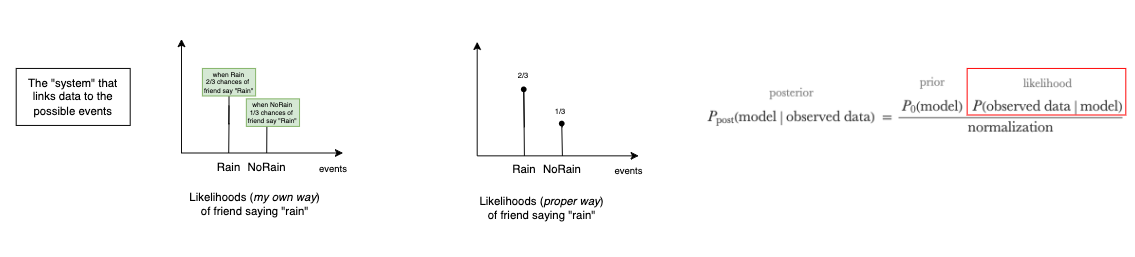

In [363]:
# We observed the data when calling our friend
likelihood = pd.DataFrame({\
    'events': ['Rain', 'NoRain'],
    'likelihood': [2/3, 1/3], # We use our system, here logical thinking from what is said in the prompt, to link the observations to each event
});

likelihood

,events,likelihood
0,Rain,0.666667
1,NoRain,0.333333


## 3. Now you combine both to answer the question "What are the chances of Raining (A) if event "Friend telling rain" happened ?

What you can tell looking at the graph, is the chances of the friend saying "rain" if A or saying "rain" if B.

To apply Bayes Rule and answer the question, you need to restrict the events to only the ""rain" - friend" events

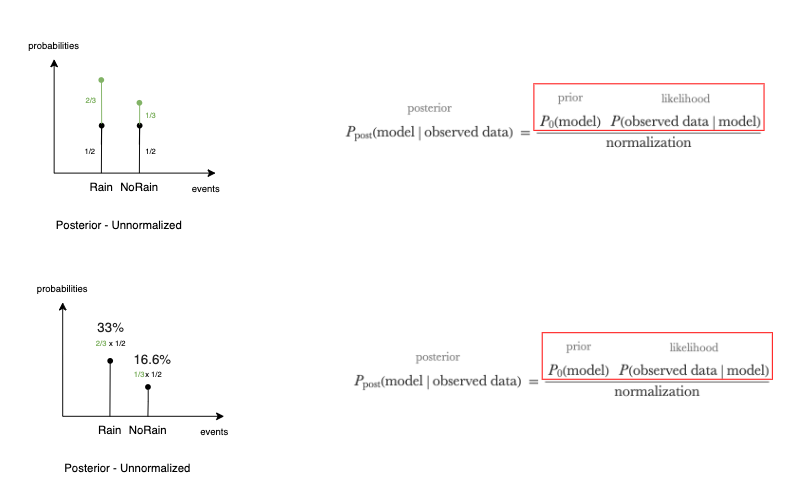

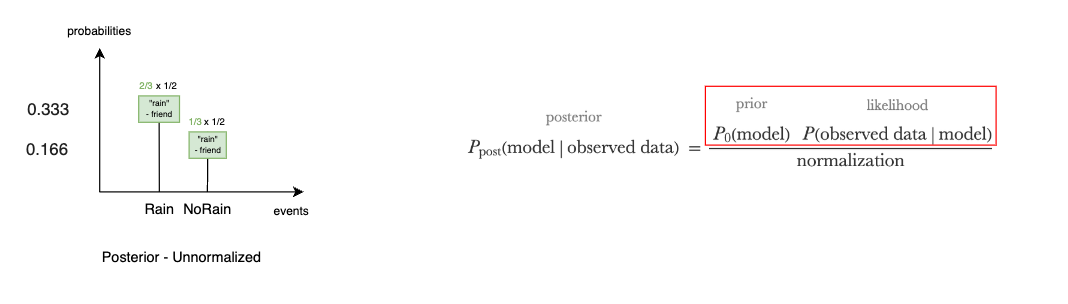

In [364]:
bayes = pd.concat([probabilities, likelihood.drop(columns=['events'])], axis=1)
bayes

,events,prior_knowledge,likelihood
0,Rain,0.5,0.666667
1,NoRain,0.5,0.333333


In [365]:
bayes['posterior_unnormalized'] = bayes['prior_knowledge'] * bayes['likelihood']
bayes

,events,prior_knowledge,likelihood,posterior_unnormalized
0,Rain,0.5,0.666667,0.333333
1,NoRain,0.5,0.333333,0.166667


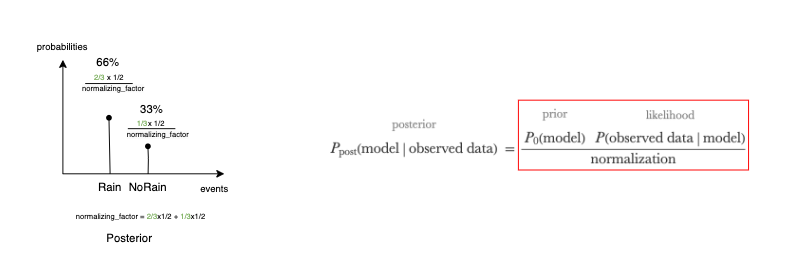

In [366]:
bayes['posterior'] = bayes['posterior_unnormalized'] / bayes['posterior_unnormalized'].sum()
bayes

,events,prior_knowledge,likelihood,posterior_unnormalized,posterior
0,Rain,0.5,0.666667,0.333333,0.666667
1,NoRain,0.5,0.333333,0.166667,0.333333


Finally, this way, we can answer that the probabilities of rain (A) given that the friend said that it was raining is 66%.

# Bayes for more categories

From 2 categories, we can move to more categories

From : https://www.bayesrulesbook.com/chapter-2#michelle-simple

>For example, suppose you're watching an interview of somebody that lives in the United States. Without knowing anything about this person, U.S. Census figures provide prior information about the region in which they might live: the Midwest ( M ), Northeast ( N ), South ( S ), or West ( W ).16 This prior model is summarized in Table 2.5.17 Notice that the South is the most populous region and the Northeast the least (P(S) > P(N)). Thus, based on population statistics alone, there's a 38% prior probability that the interviewee lives in the South

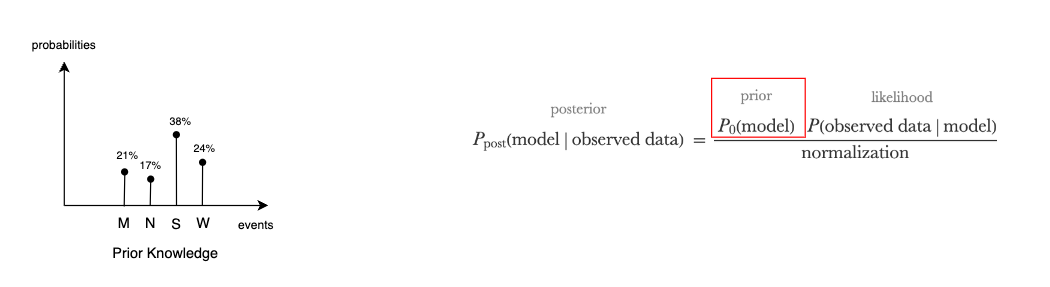

In [367]:
# We observered the data when the person said "pop"
probabilities = pd.DataFrame({
    'events': ['M', 'N', 'S', 'W'],
    'prior_knowledge': [0.21, 0.17, 0.38, 0.24],  # The likelihoods are derived from analysing data in each region.
});

probabilities

,events,prior_knowledge
0,M,0.21
1,N,0.17
2,S,0.38
3,W,0.24


> But then, you see the person point to a fizzy cola drink and say “please pass my pop.” Though the country is united in its love of fizzy drinks, it’s divided in what they’re called, with common regional terms including “pop,” “soda,” and “coke.” This data, i.e., the person’s use of “pop,” provides further information about where they might live. To evaluate this data, we can examine the pop_vs_soda dataset in the bayesrules package (Dogucu, Johnson, and Ott 2021) which includes 374250 responses to a volunteer survey conducted at popvssoda.com

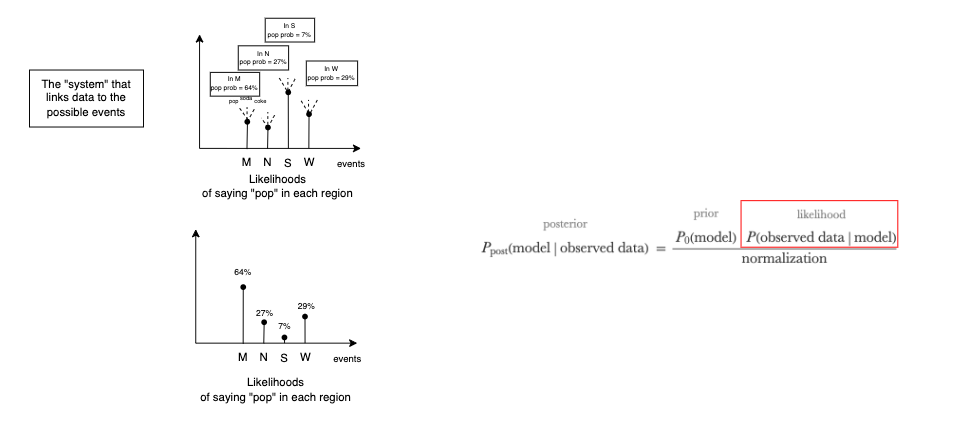

In [368]:
likelihood = pd.DataFrame({
    'events': ['M', 'N', 'S', 'W'],
    'likelihood': [0.6447, 0.2734, 0.07922, 0.2943], # We use our system, here obserbing data in each region, to link the observations to each event
});

likelihood

,events,likelihood
0,M,0.64470
1,N,0.27340
2,S,0.07922
3,W,0.29430


In [369]:
bayes = pd.concat([probabilities, likelihood.drop(columns=['events'])], axis=1)
bayes

,events,prior_knowledge,likelihood
0,M,0.21,0.64470
1,N,0.17,0.27340
2,S,0.38,0.07922
3,W,0.24,0.29430


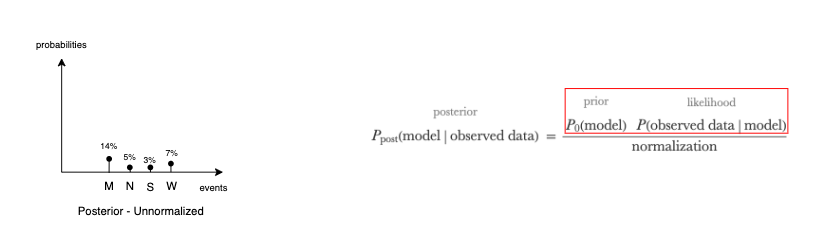

In [370]:
bayes['posterior_unnormalized'] = bayes['prior_knowledge'] * bayes['likelihood']
bayes

,events,prior_knowledge,likelihood,posterior_unnormalized
0,M,0.21,0.64470,0.135387
1,N,0.17,0.27340,0.046478
2,S,0.38,0.07922,0.030104
3,W,0.24,0.29430,0.070632


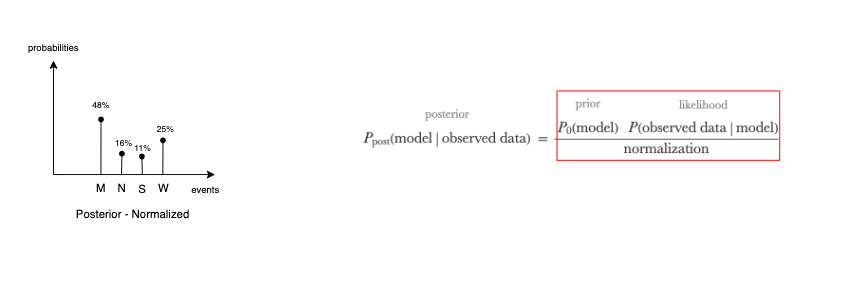

In [371]:
bayes['posterior'] = bayes['posterior_unnormalized'] / bayes['posterior_unnormalized'].sum()
bayes

,events,prior_knowledge,likelihood,posterior_unnormalized,posterior
0,M,0.21,0.64470,0.135387,0.479075
1,N,0.17,0.27340,0.046478,0.164465
2,S,0.38,0.07922,0.030104,0.106523
3,W,0.24,0.29430,0.070632,0.249936


# Bayes for random variable, still discrete

We now have a system where, if we have prior events with prior probabilities, and some "data" event happening that relate to the prior events with some probabilities, we can derive a posterior where we update our knowledge on the prior events.

*The Trick*

Magically, we can use this exact system with a Statistical Model, and adapt it the following way:
- The "prior events" are going to be a random variable of a statistical model
- The "data events" are going to be observations you make of the statistical model outputs


In [372]:
probabilities = pd.DataFrame({
    'events': ['0.2', '0.5', '0.8'],
    'prior_knowledge': [0.1, 0.25, 0.65],
});

probabilities

,events,prior_knowledge
0,0.2,0.10
1,0.5,0.25
2,0.8,0.65


the binomial model is the "system" we use to find the likelihood at each event, at each potential value of PI

In [373]:
# We observed 1 victory out of 6 games
likelihood = pd.DataFrame({
    'events': ['0.2', '0.5', '0.8'],
    'likelihood': [
        binom.pmf(k=1, n=6, p=0.1),  # We use our system, here the Binomial distribution, to link the observations to each event
        binom.pmf(k=1, n=6, p=0.25),  # We use our system, here the Binomial distribution, to link the observations to each event
        binom.pmf(k=1, n=6, p=0.65)], # We use our system, here the Binomial distribution, to link the observations to each event
});

likelihood

,events,likelihood
0,0.2,0.354294
1,0.5,0.355957
2,0.8,0.020484


In [374]:
bayes = pd.concat([probabilities, likelihood.drop(columns=['events'])], axis=1)
bayes

,events,prior_knowledge,likelihood
0,0.2,0.10,0.354294
1,0.5,0.25,0.355957
2,0.8,0.65,0.020484


In [375]:
bayes['posterior_unnormalized'] = bayes['prior_knowledge'] * bayes['likelihood']
bayes

,events,prior_knowledge,likelihood,posterior_unnormalized
0,0.2,0.10,0.354294,0.035429
1,0.5,0.25,0.355957,0.088989
2,0.8,0.65,0.020484,0.013314


In [376]:
bayes['posterior'] = bayes['posterior_unnormalized'] / bayes['posterior_unnormalized'].sum()
bayes

,events,prior_knowledge,likelihood,posterior_unnormalized,posterior
0,0.2,0.10,0.354294,0.035429,0.257233
1,0.5,0.25,0.355957,0.088989,0.646100
2,0.8,0.65,0.020484,0.013314,0.096667


# Bayes for continuous random variable

Instead of considering only 3 possible events, 3 possible values to the PI, we can define a continuous set of possible events

<StemContainer object of 3 artists>

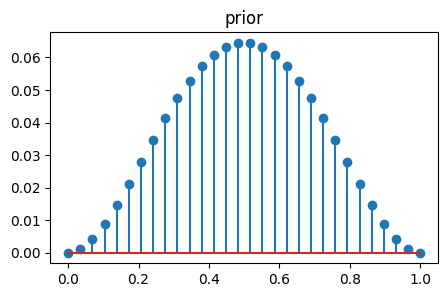

In [377]:
linspace = np.linspace(0, 1, 30)
pdf = beta.pdf(x=linspace, a=3, b=3)
pdf = pdf/pdf.sum()
plt.title('prior')
plt.stem(linspace, pdf)

In [378]:
probabilities = pd.DataFrame({
    'events': linspace,
    'prior_knowledge': pdf,
});

probabilities

,events,prior_knowledge
0,0.000000,0.000000
1,0.034483,0.001147
2,0.068966,0.004265
3,0.103448,0.008899
4,0.137931,0.014626
5,0.172414,0.021062
6,0.206897,0.027854
7,0.241379,0.034688
8,0.275862,0.041281
9,0.310345,0.047389


In [379]:
# We observed 5 YES and 3 NO
likelihood = pd.DataFrame({
    'events': linspace,
    'likelihood': [
        binom.pmf(k=1, n=8, p=probability) # We use our system, here the PMF of the Binomial, to link the observations to each event
        for probability in linspace],
});

likelihood

,events,likelihood
0,0.000000,0.000000e+00
1,0.034483,2.157805e-01
2,0.068966,3.345664e-01
3,0.103448,3.853370e-01
4,0.137931,3.904326e-01
5,0.172414,3.667370e-01
6,0.206897,3.267022e-01
7,0.241379,2.792305e-01
8,0.275862,2.304258e-01
9,0.310345,1.842292e-01


<StemContainer object of 3 artists>

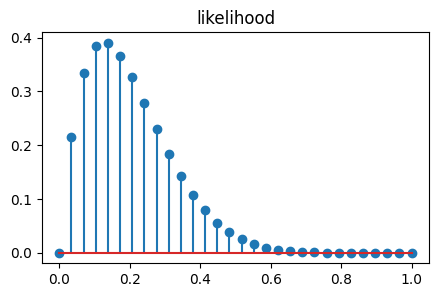

In [380]:
plt.title('likelihood')
plt.stem(likelihood['events'], likelihood['likelihood'])

In [381]:
bayes = pd.concat([probabilities, likelihood.drop(columns=['events'])], axis=1)
bayes

,events,prior_knowledge,likelihood
0,0.000000,0.000000,0.000000e+00
1,0.034483,0.001147,2.157805e-01
2,0.068966,0.004265,3.345664e-01
3,0.103448,0.008899,3.853370e-01
4,0.137931,0.014626,3.904326e-01
5,0.172414,0.021062,3.667370e-01
6,0.206897,0.027854,3.267022e-01
7,0.241379,0.034688,2.792305e-01
8,0.275862,0.041281,2.304258e-01
9,0.310345,0.047389,1.842292e-01


In [382]:
bayes['posterior_unnormalized'] = bayes['prior_knowledge'] * bayes['likelihood']
bayes

,events,prior_knowledge,likelihood,posterior_unnormalized
0,0.000000,0.000000,0.000000e+00,0.000000e+00
1,0.034483,0.001147,2.157805e-01,2.474344e-04
2,0.068966,0.004265,3.345664e-01,1.426927e-03
3,0.103448,0.008899,3.853370e-01,3.428955e-03
4,0.137931,0.014626,3.904326e-01,5.710550e-03
5,0.172414,0.021062,3.667370e-01,7.724121e-03
6,0.206897,0.027854,3.267022e-01,9.100016e-03
7,0.241379,0.034688,2.792305e-01,9.685814e-03
8,0.275862,0.041281,2.304258e-01,9.512211e-03
9,0.310345,0.047389,1.842292e-01,8.730425e-03


In [383]:
bayes['posterior'] = bayes['posterior_unnormalized'] / bayes['posterior_unnormalized'].sum()
bayes

,events,prior_knowledge,likelihood,posterior_unnormalized,posterior
0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
1,0.034483,0.001147,2.157805e-01,2.474344e-04,2.948492e-03
2,0.068966,0.004265,3.345664e-01,1.426927e-03,1.700363e-02
3,0.103448,0.008899,3.853370e-01,3.428955e-03,4.086031e-02
4,0.137931,0.014626,3.904326e-01,5.710550e-03,6.804838e-02
5,0.172414,0.021062,3.667370e-01,7.724121e-03,9.204261e-02
6,0.206897,0.027854,3.267022e-01,9.100016e-03,1.084381e-01
7,0.241379,0.034688,2.792305e-01,9.685814e-03,1.154186e-01
8,0.275862,0.041281,2.304258e-01,9.512211e-03,1.133500e-01
9,0.310345,0.047389,1.842292e-01,8.730425e-03,1.040340e-01


<StemContainer object of 3 artists>

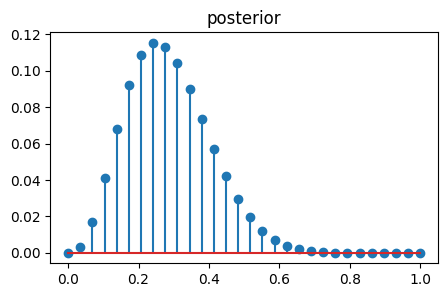

In [384]:
plt.title('posterior')
plt.stem(linspace, bayes['posterior'])

# Using it for a regression

https://www.bayesrulesbook.com/chapter-9

So far, this is neat, but not very useful.
How can we use this system for a regression ?

The idea is to assign things in the following way:
- For a regression Yi = Gaussian(mu=Alpha + Beta * Xi, sigma=variance) (for a single Sample!!)
- The "events" are going to be the possible values of Alpha and Beta
- The "system" linking a likelihood to each possible events is going to be applying the linear system with the chosen Alpha, Beta and the observed Xi and Yi fo this sample.

In [385]:
from scipy.stats import expon, beta, norm

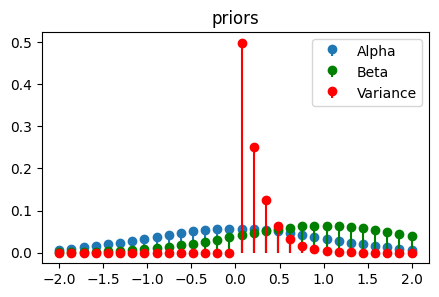

In [386]:
linspace = np.linspace(-2, 2, 30)

alpha_pdf = norm.pdf(x=linspace, loc=0, scale=1)
alpha_pdf = alpha_pdf / alpha_pdf.sum()

beta_pdf = norm.pdf(x=linspace, loc=1, scale=1)
beta_pdf = beta_pdf / beta_pdf.sum()

gaussian_variance_pdf = expon.pdf(x=linspace, scale=0.2)
gaussian_variance_pdf = gaussian_variance_pdf / gaussian_variance_pdf.sum()

plt.title('priors')
plt.stem(linspace, alpha_pdf, label='Alpha', basefmt=" ")
plt.stem(linspace, beta_pdf, 'g', label='Beta', basefmt=" ")
plt.stem(linspace, gaussian_variance_pdf, 'r', label='Variance', basefmt=" ")
plt.legend()
plt.show()

In [387]:
from IPython.display import display

probabilities_alpha = pd.DataFrame({
    'event_alpha': linspace,
    'prior_knowledge_alpha': alpha_pdf,
});

probabilities_beta = pd.DataFrame({
    'event_beta': linspace,
    'prior_knowledge_beta': beta_pdf,
});

probabilities_variance = pd.DataFrame({
    'event_variance': linspace,
    'prior_knowledge_variance': gaussian_variance_pdf,
});

display(probabilities_alpha.head())
display(probabilities_beta.head())
display(probabilities_variance.head())

,event_alpha,prior_knowledge_alpha
0,-2.000000,0.007744
1,-1.862069,0.010108
2,-1.724138,0.012944
3,-1.586207,0.016264
4,-1.448276,0.020050


,event_beta,prior_knowledge_beta
0,-2.000000,0.000714
1,-1.862069,0.001069
2,-1.724138,0.001572
3,-1.586207,0.002267
4,-1.448276,0.003208


,event_variance,prior_knowledge_variance
0,-2.000000,0.0
1,-1.862069,0.0
2,-1.724138,0.0
3,-1.586207,0.0
4,-1.448276,0.0


In [388]:
all_possible_events= pd.merge(
    left=pd.merge(left=probabilities_alpha,
                  right=probabilities_beta,
                  how='cross'),
    right=probabilities_variance,
    how='cross')

all_possible_events

,event_alpha,prior_knowledge_alpha,event_beta,prior_knowledge_beta,event_variance,prior_knowledge_variance
0,-2.0,0.007744,-2.0,0.000714,-2.000000,0.000000
1,-2.0,0.007744,-2.0,0.000714,-1.862069,0.000000
2,-2.0,0.007744,-2.0,0.000714,-1.724138,0.000000
3,-2.0,0.007744,-2.0,0.000714,-1.586207,0.000000
4,-2.0,0.007744,-2.0,0.000714,-1.448276,0.000000
...,...,...,...,...,...,...
26995,2.0,0.007744,2.0,0.038963,1.448276,0.000504
26996,2.0,0.007744,2.0,0.038963,1.586207,0.000253
26997,2.0,0.007744,2.0,0.038963,1.724138,0.000127
26998,2.0,0.007744,2.0,0.038963,1.862069,0.000064


In [389]:
# We image a system where each day, the chance of rain is represented by number_of_clients = alpha + beta * temperature
# We observed a day with 15 degrees, and 5 clients
# What is the likelihood of these observations at each possible "event" of alpha, beta and variance ?
likelihood = pd.DataFrame({
    'likelihood': [
         norm.pdf(x=5,                                             # We observe 5 clients
                 loc=row['event_alpha'] + row['event_beta'] * 15,  # We had 15 degrees, and every possible combinations of alpha, beta and variance
                 scale=row['event_variance'])
         for _, row in all_possible_events.iterrows()],
}, index=all_possible_events.index);

all_possible_events['likelihood'] = likelihood
all_possible_events

,event_alpha,prior_knowledge_alpha,event_beta,prior_knowledge_beta,event_variance,prior_knowledge_variance,likelihood
0,-2.0,0.007744,-2.0,0.000714,-2.000000,0.000000,NaN
1,-2.0,0.007744,-2.0,0.000714,-1.862069,0.000000,NaN
2,-2.0,0.007744,-2.0,0.000714,-1.724138,0.000000,NaN
3,-2.0,0.007744,-2.0,0.000714,-1.586207,0.000000,NaN
4,-2.0,0.007744,-2.0,0.000714,-1.448276,0.000000,NaN
...,...,...,...,...,...,...,...
26995,2.0,0.007744,2.0,0.038963,1.448276,0.000504,9.315490e-77
26996,2.0,0.007744,2.0,0.038963,1.586207,0.000253,3.050667e-64
26997,2.0,0.007744,2.0,0.038963,1.724138,0.000127,1.294506e-54
26998,2.0,0.007744,2.0,0.038963,1.862069,0.000064,4.739220e-47


In [390]:
all_possible_events.sort_values('likelihood', ascending=False).head()

,event_alpha,prior_knowledge_alpha,event_beta,prior_knowledge_beta,event_variance,prior_knowledge_variance,likelihood
25695,1.862069,0.010108,0.206897,0.046904,0.068966,0.498267,5.104947
12225,-0.206897,0.056012,0.344828,0.051831,0.068966,0.498267,5.104947
25696,1.862069,0.010108,0.206897,0.046904,0.206897,0.250005,1.901625
12226,-0.206897,0.056012,0.344828,0.051831,0.206897,0.250005,1.901625
13125,-0.068966,0.057088,0.344828,0.051831,0.068966,0.498267,1.878005


In [391]:
all_possible_events['posterior_unnormalized_alpha'] = all_possible_events['prior_knowledge_alpha'] * all_possible_events['likelihood']
all_possible_events['posterior_unnormalized_beta'] = all_possible_events['prior_knowledge_beta'] * all_possible_events['likelihood']
all_possible_events['posterior_unnormalized_variance'] = all_possible_events['prior_knowledge_variance'] * all_possible_events['likelihood']
all_possible_events

,event_alpha,prior_knowledge_alpha,event_beta,prior_knowledge_beta,event_variance,prior_knowledge_variance,likelihood,posterior_unnormalized_alpha,posterior_unnormalized_beta,posterior_unnormalized_variance
0,-2.0,0.007744,-2.0,0.000714,-2.000000,0.000000,NaN,NaN,NaN,NaN
1,-2.0,0.007744,-2.0,0.000714,-1.862069,0.000000,NaN,NaN,NaN,NaN
2,-2.0,0.007744,-2.0,0.000714,-1.724138,0.000000,NaN,NaN,NaN,NaN
3,-2.0,0.007744,-2.0,0.000714,-1.586207,0.000000,NaN,NaN,NaN,NaN
4,-2.0,0.007744,-2.0,0.000714,-1.448276,0.000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
26995,2.0,0.007744,2.0,0.038963,1.448276,0.000504,9.315490e-77,7.214269e-79,3.629618e-78,4.693896e-80
26996,2.0,0.007744,2.0,0.038963,1.586207,0.000253,3.050667e-64,2.362552e-66,1.188639e-65,7.712748e-68
26997,2.0,0.007744,2.0,0.038963,1.724138,0.000127,1.294506e-54,1.002515e-56,5.043818e-56,1.642120e-58
26998,2.0,0.007744,2.0,0.038963,1.862069,0.000064,4.739220e-47,3.670232e-49,1.846555e-48,3.016437e-51


In [392]:
all_possible_events['posterior_alpha'] = all_possible_events['posterior_unnormalized_alpha'] / all_possible_events['posterior_unnormalized_alpha'].sum()
all_possible_events['posterior_beta'] = all_possible_events['posterior_unnormalized_beta'] / all_possible_events['posterior_unnormalized_beta'].sum()
all_possible_events['posterior_variance'] = all_possible_events['posterior_unnormalized_variance'] / all_possible_events['posterior_unnormalized_variance'].sum()
all_possible_events

,event_alpha,prior_knowledge_alpha,event_beta,prior_knowledge_beta,event_variance,prior_knowledge_variance,likelihood,posterior_unnormalized_alpha,posterior_unnormalized_beta,posterior_unnormalized_variance,posterior_alpha,posterior_beta,posterior_variance
0,-2.0,0.007744,-2.0,0.000714,-2.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-2.0,0.007744,-2.0,0.000714,-1.862069,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-2.0,0.007744,-2.0,0.000714,-1.724138,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-2.0,0.007744,-2.0,0.000714,-1.586207,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-2.0,0.007744,-2.0,0.000714,-1.448276,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26995,2.0,0.007744,2.0,0.038963,1.448276,0.000504,9.315490e-77,7.214269e-79,3.629618e-78,4.693896e-80,9.975740e-80,3.273156e-79,3.237170e-81
26996,2.0,0.007744,2.0,0.038963,1.586207,0.000253,3.050667e-64,2.362552e-66,1.188639e-65,7.712748e-68,3.266888e-67,1.071904e-66,5.319137e-69
26997,2.0,0.007744,2.0,0.038963,1.724138,0.000127,1.294506e-54,1.002515e-56,5.043818e-56,1.642120e-58,1.386256e-57,4.548467e-57,1.132497e-59
26998,2.0,0.007744,2.0,0.038963,1.862069,0.000064,4.739220e-47,3.670232e-49,1.846555e-48,3.016437e-51,5.075120e-50,1.665205e-49,2.080302e-52


<Axes: title={'center': 'posterior alpha'}>

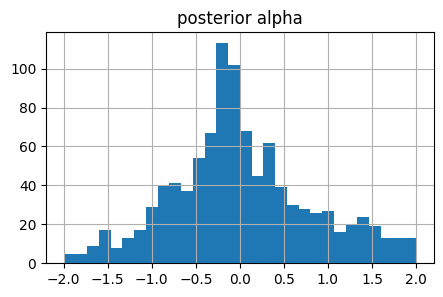

In [393]:
from numpy.random import choice

plt.title('posterior alpha')
all_possible_events_ = all_possible_events.dropna()
sample_events_alpha = choice(a=all_possible_events_['event_alpha'].values, p=all_possible_events_['posterior_alpha'].values, size=1000)
pd.Series(sample_events_alpha).hist(bins=30)

<Axes: title={'center': 'posterior beta'}>

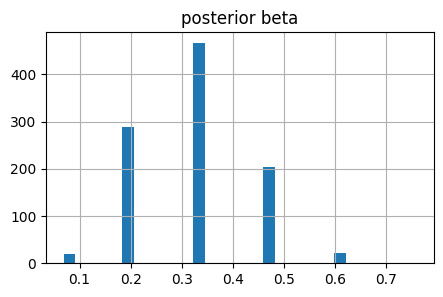

In [394]:
plt.title('posterior beta')
all_possible_events_ = all_possible_events.dropna()
sample_events_beta = choice(a=all_possible_events_['event_beta'].values, p=all_possible_events_['posterior_beta'].values, size=1000)
pd.Series(sample_events_beta).hist(bins=30)

<Axes: title={'center': 'posterior variance'}>

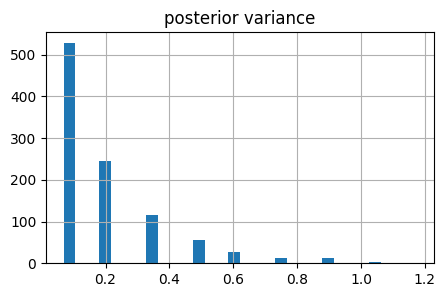

In [395]:
plt.title('posterior variance')
all_possible_events_ = all_possible_events.dropna()
sample_events_variance = choice(a=all_possible_events_['event_variance'].values, p=all_possible_events_['posterior_variance'].values, size=1000)
pd.Series(sample_events_variance).hist(bins=30)

# Doing the same with PyMC

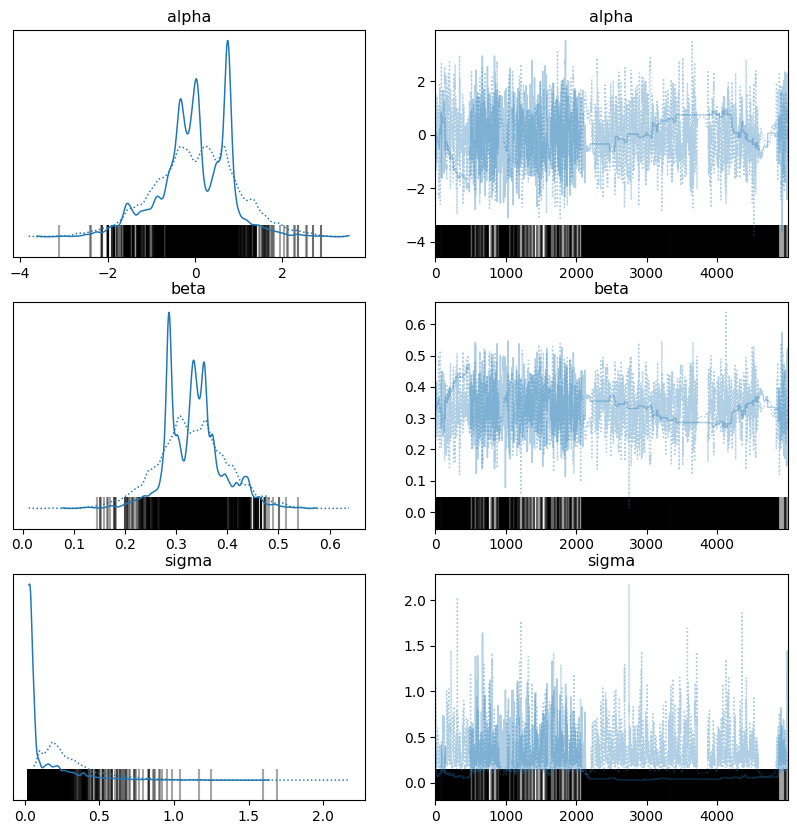

In [396]:
import pymc as pm
import arviz as az

basic_model = pm.Model()


# Reminder: This is how we did it manually

# linspace = np.linspace(0, 1, 30)
# alpha_pdf = beta.pdf(x=linspace, a=3, b=3)
# alpha_pdf = alpha_pdf / alpha_pdf.sum()

# beta_pdf = beta.pdf(x=linspace, a=3, b=1)
# beta_pdf = beta_pdf / beta_pdf.sum()

# gaussian_variance_pdf = expon.pdf(x=linspace, scale=0.2)
# gaussian_variance_pdf = gaussian_variance_pdf / gaussian_variance_pdf.sum()

Y = [5] # The number of clients
X1 = [15] # The temperature

with basic_model:

    # Let's do the same with PyMC
    alpha = pm.Normal("alpha", 0, 1)
    beta = pm.Normal("beta", 1, 1)
    sigma = pm.Exponential("sigma", scale=0.2)

    # Expected value of outcome
    mu = alpha + beta * X1

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=Y)

    trace = pm.sample(5000)

az.plot_trace(trace, figsize=(10, 10));

# Re-exploring the initial problem, but differently

In the first problem of this notebook, we analyzed the probability of 2 events, "Rain" and "NoRain" based on some additional observerd data.

Let's reproduce our results with PyMC, where we model the initial events as "Rain" and "NoRain"

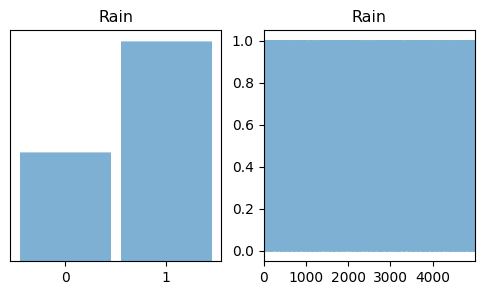

In [397]:
basic_model = pm.Model()
with basic_model:

    p = pm.Bernoulli("Rain", 0.5) # A prio on the Rain event
    p_yes = p * 2/3 + (1-p) * 1/3
    Y_obs = pm.Bernoulli("Y_obs", p=p_yes, observed=1) # The chances of observing "Friend saying it rains"

    trace = pm.sample(5000)

az.plot_trace(trace, figsize=(6,3));

Another way to tackle the same problem is to consider the events to be all possible values of "p", the probability of a binomial distribution that would represent the chances of raining.

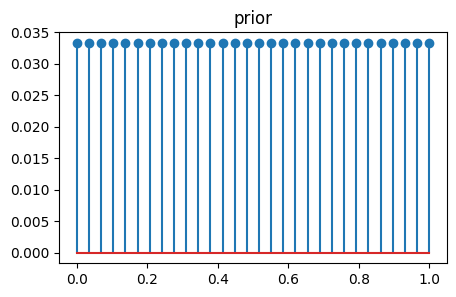

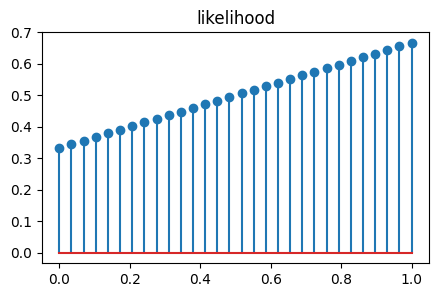

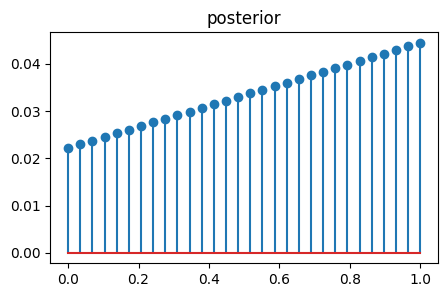

In [398]:


linspace = np.linspace(0, 1, 30)
pdf = uniform.pdf(x=linspace)
pdf = pdf/pdf.sum()

plt.title('prior')
plt.stem(linspace, pdf)
plt.show()

probabilities = pd.DataFrame({
    'events': linspace,
    'prior_knowledge': pdf,
});

probabilities

# We observed 1 friend saying "rain"
likelihood = pd.DataFrame({
    'events': linspace,
    'likelihood': [
        bernoulli.pmf(k=1, p=1/3*(1-probability) + 2/3*probability) # Here the system is the link between rain and the friend lying about it
        for probability in linspace],
});

likelihood

plt.title('likelihood')
plt.stem(likelihood['events'], likelihood['likelihood'])
plt.show()

bayes = pd.concat([probabilities, likelihood.drop(columns=['events'])], axis=1)
bayes

bayes['posterior_unnormalized'] = bayes['prior_knowledge'] * bayes['likelihood']
bayes

bayes['posterior'] = bayes['posterior_unnormalized'] / bayes['posterior_unnormalized'].sum()
bayes

plt.title('posterior')
plt.stem(linspace, bayes['posterior'])
plt.show()

Now the same but with PyMC

/usr/local/lib/python3.10/dist-packages/pytensor/link/vm.py:1172: UserWarning: Detected reference count inconsistency after CVM construction
  warnings.warn(


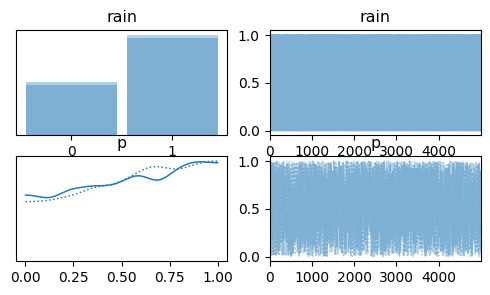

In [399]:
basic_model = pm.Model()
with basic_model:
    p = pm.Uniform("p", 0, 1) # A flat prior between 0 and 1 for the probability of rain
    rain = pm.Bernoulli("rain", p=p) # we plug it in here
    p_yes = rain * 2/3 + (1-rain) * 1/3
    Y_obs = pm.Bernoulli("Y_obs", p=p_yes, observed=1) # The chances of observing "Friend saying it rains"

    trace = pm.sample(5000)

az.plot_trace(trace, figsize=(6,3));